In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.18.1.


In [4]:
filename = 'dorothea_train.data'
filein = open(filename, 'r')
filelines = filein.readlines()
filein.close()

n_elements = len(filelines)
n_features = 100000

train_data = np.zeros((n_elements, n_features))

for i in range(n_elements):
    nums = filelines[i].split()
    for n in nums:
        j = int(n) - 1
        train_data[i,j] = 1
        
filename = 'dorothea_test.data'
filein = open(filename, 'r')
filelines = filein.readlines()
filein.close()

n_elements = len(filelines)
n_features = 100000

test_data = np.zeros((n_elements, n_features))

for i in range(n_elements):
    nums = filelines[i].split()
    for n in nums:
        j = int(n) - 1
        train_data[i,j] = 1
        
filename = 'dorothea_valid.data'
filein = open(filename, 'r')
filelines = filein.readlines()
filein.close()

n_elements = len(filelines)
n_features = 100000

valid_data = np.zeros((n_elements, n_features))

for i in range(n_elements):
    nums = filelines[i].split()
    for n in nums:
        j = int(n) - 1
        valid_data[i,j] = 1

In [5]:
train_data=pd.DataFrame(train_data)
test_data=pd.DataFrame(test_data)
valid_data=pd.DataFrame(valid_data)

In [6]:
train_target=np.genfromtxt("dorothea_train.labels")
valid_target=np.genfromtxt("dorothea_valid.labels")

In [7]:
from sklearn import preprocessing
normal_train=pd.DataFrame(train_data)
normal_test=pd.DataFrame(test_data)
normal_valid=pd.DataFrame(valid_data)

In [8]:
train_target=np.ravel(train_target)
valid_target=np.ravel(valid_target)

In [9]:
from sklearn.ensemble import RandomForestClassifier

n_trees_total = 60
fs1 = []
for i in range(n_trees_total):
    rf = RandomForestClassifier(n_estimators=i+1)
    rf.fit(normal_train, train_target.astype(int))
    prediction = rf.predict(normal_valid)
    
    ff=(valid_target==prediction)
    exito=sum(ff)
    f=exito/len(valid_target)
    fs1.append(f)
    

max_features=None
Numero de arboles mas eficiente: 4


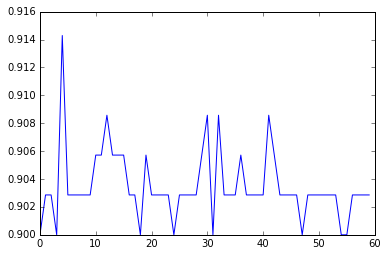

In [11]:
print("max_features=None")
print("Numero de arboles mas eficiente: "+str(np.argmax(fs1)))
plt.plot(fs1)
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier

n_trees_total = 60
fs2 = []
for i in range(n_trees_total):
    rf = RandomForestClassifier(n_estimators=i+1,max_features="log2")
    rf.fit(normal_train, train_target.astype(int))
    prediction = rf.predict(normal_valid)
    
    ff=(valid_target==prediction)
    exito=sum(ff)
    f=exito/len(valid_target)
    fs2.append(f)
    

max_feature=log2
Numero de arboles mas eficiente17


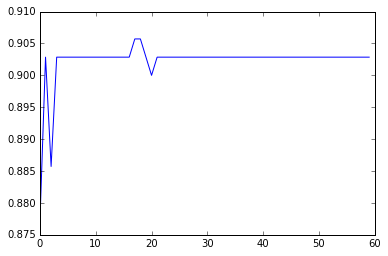

In [13]:
print("max_feature=log2")
print("Numero de arboles mas eficiente"+str(np.argmax(fs2)))
plt.plot(fs2)
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier

n_trees_total = 60
fs3= []
for i in range(n_trees_total):
    rf = RandomForestClassifier(n_estimators=i+1,max_features="sqrt")
    rf.fit(normal_train, train_target.astype(int))
    prediction = rf.predict(normal_valid)
    
    ff=(valid_target==prediction)
    exito=sum(ff)
    f=exito/len(valid_target)
    fs3.append(f)

max_feature=sqrt
Numero de arboles mas eficiente3


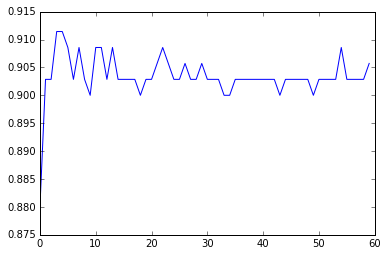

In [15]:
print("max_feature=sqrt")
print("Numero de arboles mas eficiente"+str(np.argmax(fs3)))
plt.plot(fs3)
plt.show()

In [19]:
rfinal=RandomForestClassifier(np.argmax(fs1))
rfinal.fit(normal_train,train_target.astype(int))
prediction=rfinal.predict(normal_valid)

ff=(valid_target==prediction)
exito=sum(ff)
f=exito/len(valid_target)

print("Eficiencia: "+str(f))

Eficiencia: 0.908571428571


In [20]:
ii = np.argsort(-rfinal.feature_importances_)

print("Top ten atributes:")
print("Index \t Importance")
for i in range(10):
    print(str(ii[i])+" \t"+str(rfinal.feature_importances_[ii[i]]))

Top ten atributes:
Index 	 Importance
56181 	0.0295539431501
411 	0.0274337285082
36407 	0.0202637107169
52259 	0.0185784955623
76223 	0.0169727362388
46503 	0.016541746022
44840 	0.0143299387089
89837 	0.012807453583
9463 	0.0127174292088
46231 	0.0124821198879
